In [2]:
import pandas as pd
import numpy as np
import ot
import matplotlib.pyplot as plt

In [3]:
fjc = pd.read_csv('FJC_2018.csv')
ussc = pd.read_csv('mod_ussc_2018.csv')

/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/661262006.py:1: DtypeWarning: Columns (4,11,42,54,65,96,108,113,120,125) have mixed types. Specify dtype option on import or set low_memory=False.
  fjc = pd.read_csv('FJC_2018.csv')


In [4]:
ussc = ussc[ussc['SENTYR'] == 2018]
ussc.reset_index(drop=True, inplace=True)
ussc_new = ussc[['USSCIDN','SENTMON', 'SENTYR', 'DISTRICT','SENTTOT_new', 'FINE', 'PROBATN', 'floorSENTTOT', 'roundSENTTOT','USSCcode1', 'USSCcode2', 'USSCcode3', 'USSCcode4', 'USSCcode5']]
ussc_new = ussc_new.rename({'SENTTOT_new': 'PRISTOT', 'FINE': 'FINETOT', 'PROBATN': 'PROBTOT'}, axis=1)

In [5]:
fjc.rename(columns={ fjc.columns[0]: "ID" }, inplace = True)
fjc_new = fjc[['ID','SENTMON', 'SENTYR', 'DISTRICT', 'PRISTOT', 'FINETOT', 'PROBTOT', 'FJDcode1', 'FJDcode2', 'FJDcode3', 'FJDcode4', 'FJDcode5', 'FJDcode6', 'FJDcode7', 'FJDcode8', 'FJDcode9', 'FJDcode10']]
fjc_new.replace(-8, 'NA', inplace=True)
fjc_new.replace('-8', 'NA', inplace=True)
fjc_new = fjc_new

/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/2433490406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fjc_new.replace(-8, 'NA', inplace=True)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/2433490406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fjc_new.replace('-8', 'NA', inplace=True)


In [6]:
#load matched data
matches = pd.read_csv('matched_2018.csv')
matches

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
0,4450209.0,1,2018,42,10.0,0,0,81324.0,81324.0,NaN,...,NaN,2443270.0,10.0,10.0,81324.0,NaN,NaN,NaN,NaN,1700428.0
1,4462931.0,1,2018,42,0.0,0,36,18641.0,NaN,NaN,...,NaN,2440267.0,NaN,NaN,18641.0,NaN,NaN,NaN,NaN,1700071.0
2,4476567.0,1,2018,51,188.0,0,0,21841.0,21841.0,21841.0,...,NaN,2438619.0,188.0,188.0,21841.0,NaN,NaN,NaN,NaN,1710003.0
3,4445935.0,1,2018,41,20.0,0,0,18922.0,NaN,NaN,...,NaN,2438903.0,20.0,20.0,18922.0,18924.0,NaN,NaN,NaN,1701357.0
4,4446120.0,1,2018,41,20.0,0,0,81324.0,NaN,NaN,...,NaN,2443547.0,20.0,20.0,81324.0,182.0,NaN,NaN,NaN,1701536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,4614269.0,10,2018,14,1.0,0,0,81326.0,NaN,NaN,...,NaN,2497145.0,1.0,2.0,81326.0,NaN,NaN,NaN,NaN,1800273.0
9052,4699529.0,12,2018,50,13.0,0,0,18922.0,NaN,NaN,...,NaN,2510716.0,13.0,14.0,18922.0,NaN,NaN,NaN,NaN,1700164.0
9053,4713229.0,10,2018,61,0.0,0,0,18641.0,42408.0,NaN,...,NaN,2496976.0,0.0,1.0,18641.0,NaN,NaN,NaN,NaN,1850039.0
9054,4724088.0,10,2018,69,0.0,0,0,18661.0,NaN,NaN,...,NaN,2500998.0,0.0,1.0,183146.0,181153.0,18661.0,182.0,NaN,1730108.0


In [7]:
matches_100=matches.iloc[0:100,:] #taking a sample of 100 to work with
matches_100

matches_200=matches.iloc[]


,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
0,4450209.0,1,2018,42,10.0,0,0,81324.0,81324.0,NaN,...,NaN,2443270.0,10.0,10.0,81324.0,NaN,NaN,NaN,NaN,1700428.0
1,4462931.0,1,2018,42,0.0,0,36,18641.0,NaN,NaN,...,NaN,2440267.0,NaN,NaN,18641.0,NaN,NaN,NaN,NaN,1700071.0
2,4476567.0,1,2018,51,188.0,0,0,21841.0,21841.0,21841.0,...,NaN,2438619.0,188.0,188.0,21841.0,NaN,NaN,NaN,NaN,1710003.0
3,4445935.0,1,2018,41,20.0,0,0,18922.0,NaN,NaN,...,NaN,2438903.0,20.0,20.0,18922.0,18924.0,NaN,NaN,NaN,1701357.0
4,4446120.0,1,2018,41,20.0,0,0,81324.0,NaN,NaN,...,NaN,2443547.0,20.0,20.0,81324.0,182.0,NaN,NaN,NaN,1701536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4537557.0,1,2018,79,8.0,0,0,81326.0,NaN,NaN,...,NaN,2439482.0,8.0,8.0,81326.0,NaN,NaN,NaN,NaN,1700268.0
96,4484464.0,1,2018,56,15.0,0,0,81326.0,NaN,NaN,...,NaN,2439492.0,15.0,15.0,81326.0,NaN,NaN,NaN,NaN,1700200.0
97,4549520.0,1,2018,84,5.0,0,0,21846.0,21841.0,NaN,...,NaN,2439496.0,5.0,5.0,21846.0,21841.0,21841.0,NaN,NaN,1800056.0
98,4467435.0,1,2018,45,240.0,0,0,21846.0,21841.0,NaN,...,NaN,2439499.0,240.0,240.0,21846.0,21841.0,21841.0,NaN,NaN,1420800.0


In [8]:
matches_100.reset_index()
matches_50=matches_100.iloc[0:50,:] #subsetting to 50 cases
matches_50

,ID,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,FJDcode1,FJDcode2,FJDcode3,...,FJDcode10,USSCIDN,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5,DOCKET
0,4450209.0,1,2018,42,10.0,0,0,81324.0,81324.0,NaN,...,NaN,2443270.0,10.0,10.0,81324.0,NaN,NaN,NaN,NaN,1700428.0
1,4462931.0,1,2018,42,0.0,0,36,18641.0,NaN,NaN,...,NaN,2440267.0,NaN,NaN,18641.0,NaN,NaN,NaN,NaN,1700071.0
2,4476567.0,1,2018,51,188.0,0,0,21841.0,21841.0,21841.0,...,NaN,2438619.0,188.0,188.0,21841.0,NaN,NaN,NaN,NaN,1710003.0
3,4445935.0,1,2018,41,20.0,0,0,18922.0,NaN,NaN,...,NaN,2438903.0,20.0,20.0,18922.0,18924.0,NaN,NaN,NaN,1701357.0
4,4446120.0,1,2018,41,20.0,0,0,81324.0,NaN,NaN,...,NaN,2443547.0,20.0,20.0,81324.0,182.0,NaN,NaN,NaN,1701536.0
5,4465127.0,1,2018,43,180.0,0,0,21846.0,18924.0,18922.0,...,NaN,2438629.0,180.0,180.0,21846.0,18924.0,21841.0,21841.0,NaN,1700034.0
6,4439544.0,1,2018,41,36.0,0,0,18924.0,NaN,NaN,...,NaN,2438650.0,36.0,36.0,181951.0,181951.0,18924.0,181951.0,182.0,1700231.0
7,4574183.0,1,2018,31,240.0,0,0,18924.0,21841.0,18922.0,...,NaN,2439072.0,240.0,240.0,18922.0,18924.0,NaN,NaN,NaN,1780177.0
8,4574045.0,1,2018,31,240.0,0,0,21846.0,18924.0,21841.0,...,21841.0,2441714.0,240.0,240.0,21846.0,21841.0,21841.0,NaN,NaN,1580184.0
9,4461068.0,1,2018,42,18.0,0,0,18922.0,NaN,NaN,...,NaN,2441694.0,18.0,18.0,18922.0,NaN,NaN,NaN,NaN,1700153.0


In [77]:
#sample of 50
#putting together ID's that we know match
matches_50_df = matches_50[['ID', 'USSCIDN']]

#creating ussc subset data
ussc_50 = pd.merge(matches_50_df, ussc_new, on=['USSCIDN'])
ussc_50=ussc_50.drop(['ID'], axis=1)
ussc_50

#creating fjc subset data
fjc_50 = pd.merge(matches_50_df, fjc_new, on=['ID'])
fjc_50=fjc_50.drop(['USSCIDN'], axis=1)
fjc_50

#randomize
# ussc_50=ussc_50.sample(50)
# fjc_50=fjc_50.sample(50)

#resetting indices
ussc_50.reset_index(drop=True, inplace=True)
fjc_50.reset_index(drop=True, inplace=True)

In [78]:
#50 matching records
#5 unmatching records

matches_10=matches_100.iloc[51:61,:]
matches_10_df = matches_10[['ID', 'USSCIDN']]

ussc_5 = pd.merge(matches_10_df, ussc_new, on=['USSCIDN'])
ussc_5=ussc_5.drop(['ID'], axis=1)

fjc_5 = pd.merge(matches_10_df,fjc_new, on=['ID'])
fjc_5=fjc_5.drop(['USSCIDN'], axis=1)

ussc_5=ussc_5.iloc[0:5,:]
fjc_5=fjc_5.iloc[5:10,:]

In [79]:
ussc_55 = ussc_50.append(ussc_5)
ussc_55.reset_index(drop=True, inplace=True)
fjc_55=fjc_50.append(fjc_5)
fjc_55.reset_index(drop=True, inplace=True)

/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/2916855396.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ussc_55 = ussc_50.append(ussc_5)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/2916855396.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fjc_55=fjc_50.append(fjc_5)


In [132]:

cost_matrix = np.zeros((55,55))

for i in range (55): #how many ussc
    for j in range(55): #how many fjc
        value=0
        if ussc_55.iloc[i,1] != fjc_55.iloc[j,1]:
            value=value+1
        if ussc_55.iloc[i,2] != fjc_55.iloc[j,2]:
            value=value+1
        if ussc_55.iloc[i,3] != fjc_55.iloc[j,3]:
            value=value+1
        if ussc_55.iloc[i,4] != fjc_55.iloc[j,4]:
            value=value+1
        if ussc_55.iloc[i,5] != fjc_55.iloc[j,5]:
            value=value+1
        if ussc_55.iloc[i,6] != fjc_55.iloc[j,6]:
            value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_55.iloc[i,k] == fjc_55.iloc[j,7] or ussc_55.iloc[i,k]== fjc_55.iloc[j,8] or ussc_55.iloc[i,k]== fjc_55.iloc[j,9] or ussc_55.iloc[i,k]== fjc_55.iloc[i,10] or ussc_55.iloc[i,k]== fjc_55.iloc[j,11] or ussc_55.iloc[i,k]== fjc_55.iloc[j,12] or ussc_55.iloc[i,k]== fjc_55.iloc[j,13] or ussc_55.iloc[i,k]== fjc_55.iloc[j,14] or ussc_55.iloc[i,k]== fjc_55.iloc[j,15] or ussc_55.iloc[i,k]== fjc_55.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[j][i] = value + new_value

cost_matrix

a=[]
for i in range(55):
    a.append(1)

b=[]
for i in range(55):
    b.append(1)

M = cost_matrix

S = ot.emd(a,b,M)

/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/1198672663.py:36: UserWarning: Input histogram consists of integer. The transport plan will be casted accordingly, possibly resulting in a loss of precision. If this behaviour is unwanted, please make sure your input histogram consists of floating point elements.
  S = ot.emd(a,b,M)


emd


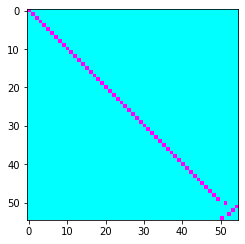

In [133]:
print("emd")
plt.imshow(S, cmap='cool', interpolation='nearest')

It.  |Err         
-------------------
    0|2.625576e+00|
   10|2.364424e-01|
   20|1.128514e-01|
   30|6.979932e-02|
   40|4.999516e-02|
   50|3.858578e-02|
   60|3.107617e-02|
   70|2.571796e-02|
   80|2.168478e-02|
   90|1.853403e-02|
  100|1.600602e-02|
  110|1.393692e-02|
  120|1.221722e-02|
  130|1.077024e-02|
  140|9.540385e-03|
  150|8.486144e-03|
  160|7.575808e-03|
  170|6.784700e-03|
  180|6.093306e-03|
  190|5.485997e-03|
It.  |Err         
-------------------
  200|4.950117e-03|
  210|4.475317e-03|
  220|4.053064e-03|
  230|3.676275e-03|
  240|3.339024e-03|
  250|3.036329e-03|
  260|2.763972e-03|
  270|2.518365e-03|
  280|2.296438e-03|
  290|2.095549e-03|
  300|1.913418e-03|
  310|1.748061e-03|
  320|1.597749e-03|
  330|1.460965e-03|
  340|1.336373e-03|
  350|1.222794e-03|
  360|1.119181e-03|
  370|1.024600e-03|
  380|9.382183e-04|
  390|8.592902e-04|
It.  |Err         
-------------------
  400|7.871449e-04|
  410|7.211784e-04|
  420|6.608460e-04|
  430|6.056549e-04|
  4

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


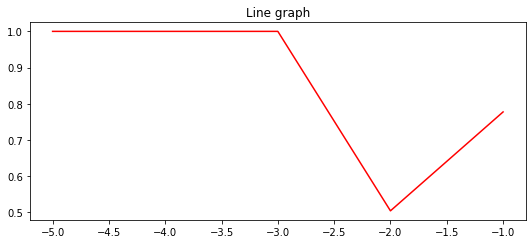

In [134]:
lambd = 2e-1
F1 = ot.sinkhorn(a, b, M, lambd, verbose=True)

lambd = 2e-2
F2 = ot.sinkhorn(a, b, M, lambd, verbose=True)

lambd = 2e-3
F3 = ot.sinkhorn(a, b, M, lambd, verbose=True)

lambd = 2e-4
F4 = ot.sinkhorn(a, b, M, lambd, verbose=True)

lambd = 2e-5
F5 = ot.sinkhorn(a, b, M, lambd, verbose=True)

#computing difference

H1 = np.max(S-F1)
H2 = np.max(S-F2)
H3 = np.max(S-F3)
H4 = np.max(S-F4)
H5 = np.max(S-F5)


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

y = np.array([H1, H2, H3, H4, H5])
x = np.array([-1, -2, -3, -4, -5])
plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()

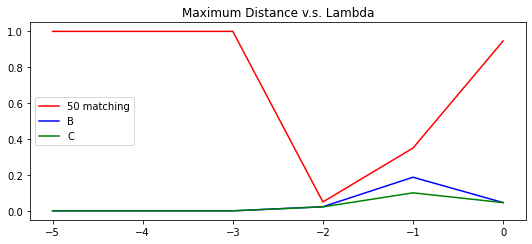

In [160]:
#creating new plot

x=np.zeros((6))
y=np.zeros((6))
z=np.zeros((6))
w=np.zeros((6))

for i in range(0,6):
    lambd = 2*10**(-i)
    F1 = ot.sinkhorn_unbalanced(a, b, M, lambd, 10, verbose=True)

    if i==2:
        F2=F1

    #next we subset this matrix
    #breaking up the matrix into blocks

    #the ground truth for the first 50 cases

    A_l=F1[0:50,0:50]
    A_c=S[0:50,0:50]
    B=F1[0:50, 50:]
    C=F1[50: ,0:50]

    #computing the values

    val1=np.max(np.abs(A_c - A_l))
    val2=np.max(B)
    val3=np.max(C)

    y[i]=val1
    x[i]=val2
    z[i]=val3
    w[i]=-i


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Maximum Distance v.s. Lambda")
plt.plot(w,y, color="red", label="50 matching")
plt.plot(w,x, color="blue", label="B")
plt.plot(w,z, color="green",label="C")
plt.legend()
plt.show()

unbalanced where reg1=2e-2 and reg2=0.2


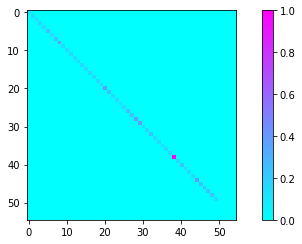

In [119]:
print("unbalanced where reg1=2e-2 and reg2=0.2")
plt.imshow(F2, cmap='cool', interpolation='nearest')
plt.colorbar()

In [83]:
#new sample
#50 matching records
#5 unmatching ussc records
#7 unmatching fjc records

matches_12=matches_100.iloc[51:63,:]
matches_12_df = matches_12[['ID', 'USSCIDN']]

ussc_5 = pd.merge(matches_12_df, ussc_new, on=['USSCIDN'])
ussc_5=ussc_5.drop(['ID'], axis=1)

fjc_7 = pd.merge(matches_12_df,fjc_new, on=['ID'])
fjc_7=fjc_7.drop(['USSCIDN'], axis=1)

ussc_5=ussc_5.iloc[0:5,:]
fjc_7=fjc_7.iloc[5:12,:]
ussc_55 = ussc_50.append(ussc_5)
ussc_55.reset_index(drop=True, inplace=True)
fjc_57=fjc_50.append(fjc_7)
fjc_57.reset_index(drop=True, inplace=True)

/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/1446535744.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ussc_55 = ussc_50.append(ussc_5)
/var/folders/rp/lgskb8cx1vzgzb8nb18p5vxw0000gn/T/ipykernel_1257/1446535744.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fjc_57=fjc_50.append(fjc_7)


In [127]:
ussc_55

,USSCIDN,SENTMON,SENTYR,DISTRICT,PRISTOT,FINETOT,PROBTOT,floorSENTTOT,roundSENTTOT,USSCcode1,USSCcode2,USSCcode3,USSCcode4,USSCcode5
0,2443270.0,1,2018,42,10.0,0,0,10.0,10.0,81324.0,NaN,NaN,NaN,NaN
1,2440267.0,1,2018,42,0.0,0,36,NaN,NaN,18641.0,NaN,NaN,NaN,NaN
2,2438619.0,1,2018,51,188.0,0,0,188.0,188.0,21841.0,NaN,NaN,NaN,NaN
3,2438903.0,1,2018,41,20.0,0,0,20.0,20.0,18922.0,18924.0,NaN,NaN,NaN
4,2443547.0,1,2018,41,20.0,0,0,20.0,20.0,81324.0,182.0,NaN,NaN,NaN
5,2438629.0,1,2018,43,180.0,0,0,180.0,180.0,21846.0,18924.0,21841.0,21841.0,NaN
6,2438650.0,1,2018,41,36.0,0,0,36.0,36.0,181951.0,181951.0,18924.0,181951.0,182.0
7,2439072.0,1,2018,31,240.0,0,0,240.0,240.0,18922.0,18924.0,NaN,NaN,NaN
8,2441714.0,1,2018,31,240.0,0,0,240.0,240.0,21846.0,21841.0,21841.0,NaN,NaN
9,2441694.0,1,2018,42,18.0,0,0,18.0,18.0,18922.0,NaN,NaN,NaN,NaN


In [125]:

cost_matrix = np.zeros((57,55))

for i in range (55): #how many ussc
    for j in range(57): #how many fjc
        value=0
        if ussc_55.iloc[i,1] != fjc_57.iloc[j,1]:
            value=value+1
        if ussc_55.iloc[i,2] != fjc_57.iloc[j,2]:
            value=value+1
        if ussc_55.iloc[i,3] != fjc_57.iloc[j,3]:
            value=value+1
        if ussc_55.iloc[i,4] != fjc_57.iloc[j,4]:
            value=value+1
        if ussc_55.iloc[i,5] != fjc_57.iloc[j,5]:
            value=value+1
        if ussc_55.iloc[i,6] != fjc_57.iloc[j,6]:
            value=value+1
        new_value=1
        for k in range(9,14):
            if ussc_55.iloc[i,k] == fjc_57.iloc[j,7] or ussc_55.iloc[i,k]== fjc_57.iloc[j,8] or ussc_55.iloc[i,k]== fjc_57.iloc[j,9] or ussc_55.iloc[i,k]== fjc_57.iloc[i,10] or ussc_55.iloc[i,k]== fjc_57.iloc[j,11] or ussc_55.iloc[i,k]== fjc_57.iloc[j,12] or ussc_55.iloc[i,k]== fjc_57.iloc[j,13] or ussc_55.iloc[i,k]== fjc_57.iloc[j,14] or ussc_55.iloc[i,k]== fjc_57.iloc[j,15] or ussc_55.iloc[i,k]== fjc_57.iloc[j,16]:
                new_value=new_value-0.2
        cost_matrix[j][i] = value + new_value

cost_matrix

a=[]
for i in range(57):
    a.append(1/57)

b=[]
for i in range(55):
    b.append(1/55)

M = cost_matrix

S = ot.emd(a,b,M)

emd
57
55


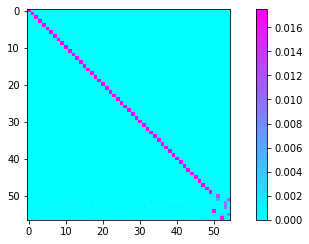

In [109]:
print("emd")
plt.imshow(S, cmap='cool', interpolation='nearest')
plt.colorbar()
print(len(S))
print(len(S[0]))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:398: RuntimeWarning: divide by zero encountered in true_divide
  u = (a / Kv) ** fi
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/ot/unbalanced.py:407: UserWarning: Numerical errors at iteration 0
  warnings.warn('Numerical errors at iteration %s' % i)


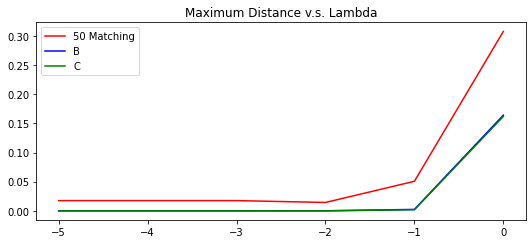

In [129]:
#creating new plot

x=np.zeros((6))
y=np.zeros((6))
z=np.zeros((6))
w=np.zeros((6))

for i in range(0,6):
    lambd = 2*10**(-i)
    F1 = ot.sinkhorn_unbalanced(a, b, M, lambd, 0.2, verbose=True)

    if i==2:
        F2=F1
        

    #next we subset this matrix
    #breaking up the matrix into blocks

    #the ground truth for the first 50 cases

    A_l=F1[0:50,0:50]
    A_c=S[0:50,0:50]
    B=F1[0:50, 50:]
    C=F1[50: , 0:50]

    #computing the values

    val1=np.max(np.abs(A_c - A_l))
    val2=np.max(B)
    val3=np.max(C)

    y[i]=val1
    x[i]=val2
    z[i]=val3
    w[i]=-i


plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.title("Maximum Distance v.s. Lambda")
plt.plot(w,y, color="red", label="50 Matching")
plt.plot(w,x, color="blue", label="B")
plt.plot(w,z, color="green",label="C")
plt.legend()
plt.show()

emd


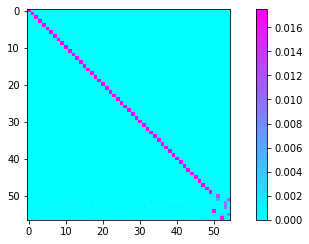

In [130]:
print("emd")
plt.imshow(S, cmap='cool', interpolation='nearest')
plt.colorbar()

reg1=2e-2 and reg2=0.2


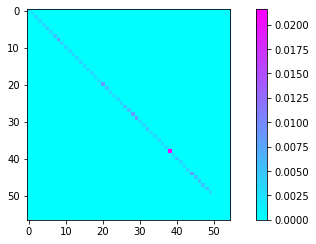

In [131]:
print("reg1=2e-2 and reg2=0.2")
plt.imshow(F2, cmap='cool', interpolation='nearest')
plt.colorbar()